In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import itertools
import re
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
caption_path = '../data/US-Capydata-ViSportIC/captions.txt'
images_path = '../data/US-Capydata-ViSportIC/images/'

In [23]:
# Read captions
with open(caption_path, 'r', encoding='utf-8') as f:
    captions = f.readlines()

captions = [caption.strip() for caption in captions]

In [24]:
num_images = len(os.listdir(images_path))
num_captions = len(captions)


print(f'Number of images: {num_images}')
print(f'Number of captions: {num_captions}')
# print(f'Number of captions: {len(set(captions.copy()))}')

Number of images: 4923
Number of captions: 24633


In [25]:
# Check why num_captions*5 != num_images
from collections import Counter

image_counts = Counter()
with open(caption_path, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) >= 2:
            image_name = parts[0]
            image_counts[image_name] += 1

# Tìm các ảnh có nhiều hơn 5 caption
for image, count in image_counts.items():
    if count != 5:
        print(f"Image {image} has {count} captions")

Image 000000487607.jpg has 10 captions
Image 000000487659.jpg has 10 captions
Image 000000487788.jpg has 10 captions
Image 000000549915.jpg has 9 captions
Image 000000300655.jpg has 4 captions


Proceed to manually delete captions with only one caption as these images are faulty, and also delete the related images.

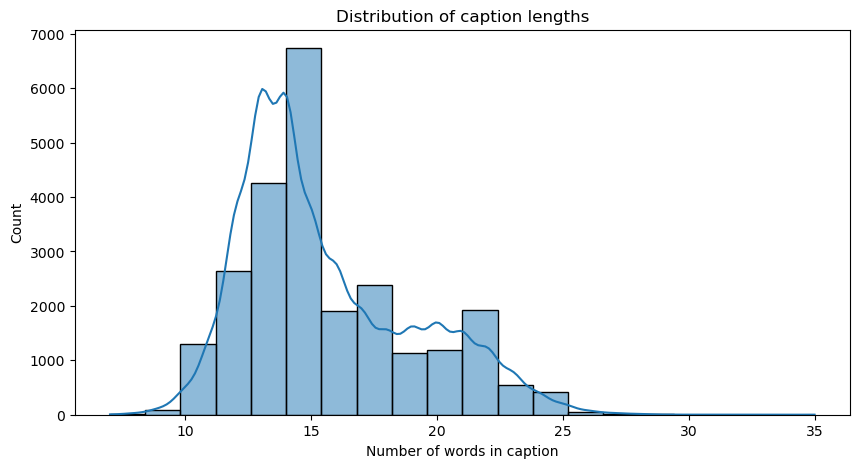

In [26]:
caption_lengths = [len(caption.split()) for caption in captions]

plt.figure(figsize=(10, 5))
sns.histplot(caption_lengths, bins=20, kde=True)
plt.xlabel('Number of words in caption')
plt.ylabel('Count')
plt.title('Distribution of caption lengths')
plt.show()

In [27]:
print(f"Số lượng caption trước khi lọc trùng lặp: {len(captions)}")
# Loại bỏ caption trùng lặp
captions = list(set(captions))
print(f"Số lượng caption sau khi lọc trùng lặp: {len(captions)}")

Số lượng caption trước khi lọc trùng lặp: 24633
Số lượng caption sau khi lọc trùng lặp: 24604


In [28]:
# Xử lí chỉ lấy captions (bỏ file đi)
captions = [caption.split('\t')[1] for caption in captions]

# Xử lý văn bản: Loại bỏ dấu câu và tokenization
processed_captions = []
for caption in captions:
    caption = re.sub(r"[^\w\s]", "", caption)  # Loại bỏ dấu câu
    caption = re.sub(r"\d+", "", caption)  # Loại bỏ số

    words = caption.split()  # Tokenization
    processed_captions.append(words)

# Đếm tần suất từ
word_counts = Counter(word for caption in processed_captions for word in caption)

# Lọc từ xuất hiện ít hơn min_freq
min_freq = 2  # Có thể điều chỉnh
vocab = {word for word, count in word_counts.items() if count >= min_freq}

In [29]:
# Tính toán một số thống kê

# Đếm tần suất từ
word_counts = Counter(word for caption in processed_captions for word in caption)

# Lọc từ xuất hiện ít hơn min_freq
min_freq = 2  # Có thể điều chỉnh
total_words = sum(word_counts.values())  # Tổng số từ (bao gồm cả từ lặp lại)
unique_words = len(word_counts)  # Số lượng từ duy nhất
rare_words = sum(1 for count in word_counts.values() if count < min_freq)  # Số từ xuất hiện ít hơn min_freq
common_words_count = sum(1 for count in word_counts.values() if count >= 10)  # Số từ xuất hiện trên 10 lần
# Tính tổng số từ trong tất cả caption
total_words_in_sentences = sum(len(caption) for caption in processed_captions)

# Tính số câu
total_sentences = len(processed_captions)

# Tính độ dài trung bình của một câu
average_sentence_length = total_words_in_sentences / total_sentences if total_sentences > 0 else 0

# In thống kê
print("Thống kê bộ từ vựng:")
print(f"- Tổng số từ xuất hiện: {total_words}")
print(f"- Số lượng từ duy nhất: {unique_words}")
print(f"- Số lượng từ xuất hiện ít hơn {min_freq} lần: {rare_words}")
print(f"- Số lượng từ xuất hiện hơn 10 lần: {common_words_count}")
print(f"- Tổng số câu (captions): {total_sentences}")
print(f"- Độ dài trung bình mỗi câu: {average_sentence_length:.2f} từ")


Thống kê bộ từ vựng:
- Tổng số từ xuất hiện: 339089
- Số lượng từ duy nhất: 3020
- Số lượng từ xuất hiện ít hơn 2 lần: 869
- Số lượng từ xuất hiện hơn 10 lần: 1127
- Tổng số câu (captions): 24604
- Độ dài trung bình mỗi câu: 13.78 từ


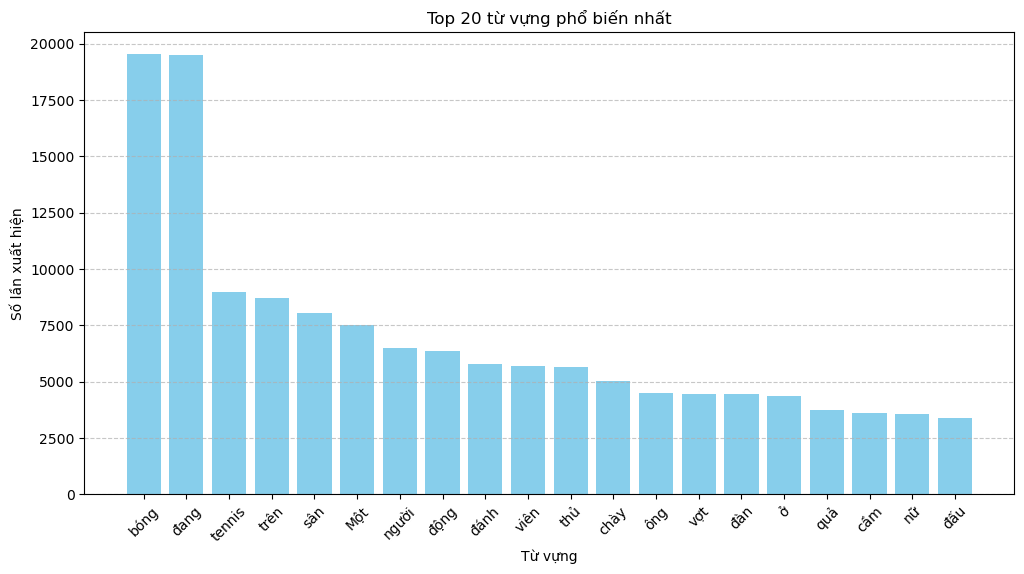

In [30]:
# Lấy 20 từ phổ biến nhất
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Từ vựng")
plt.ylabel("Số lần xuất hiện")
plt.title("Top 20 từ vựng phổ biến nhất")
plt.xticks(rotation=45) 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

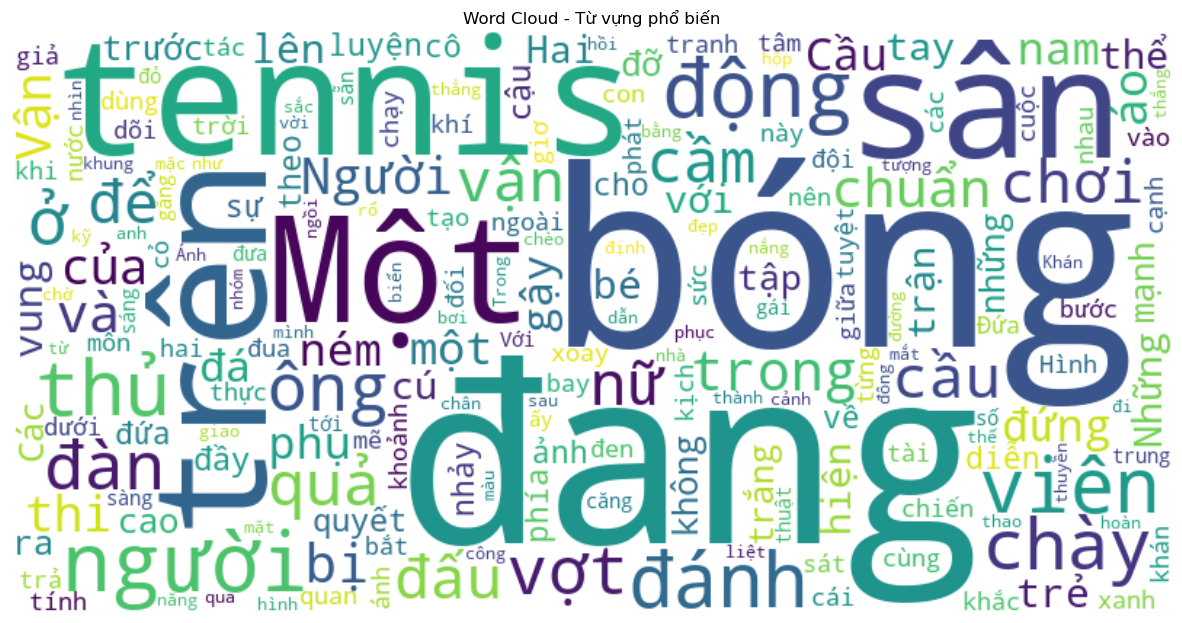

In [31]:
# Tạo WordCloud từ từ điển word_counts
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Hiển thị WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Tắt trục
plt.title("Word Cloud - Từ vựng phổ biến")
plt.show()

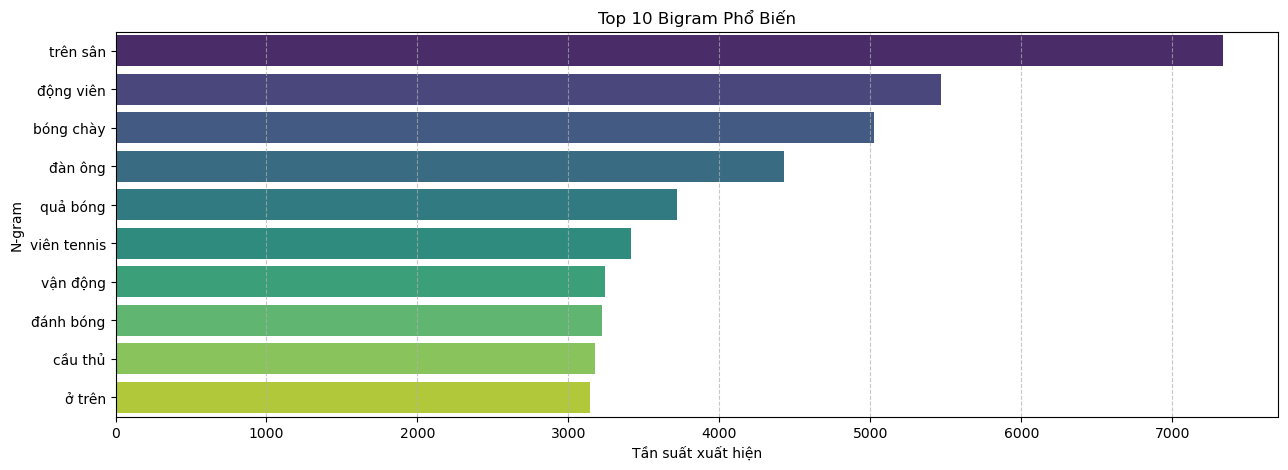

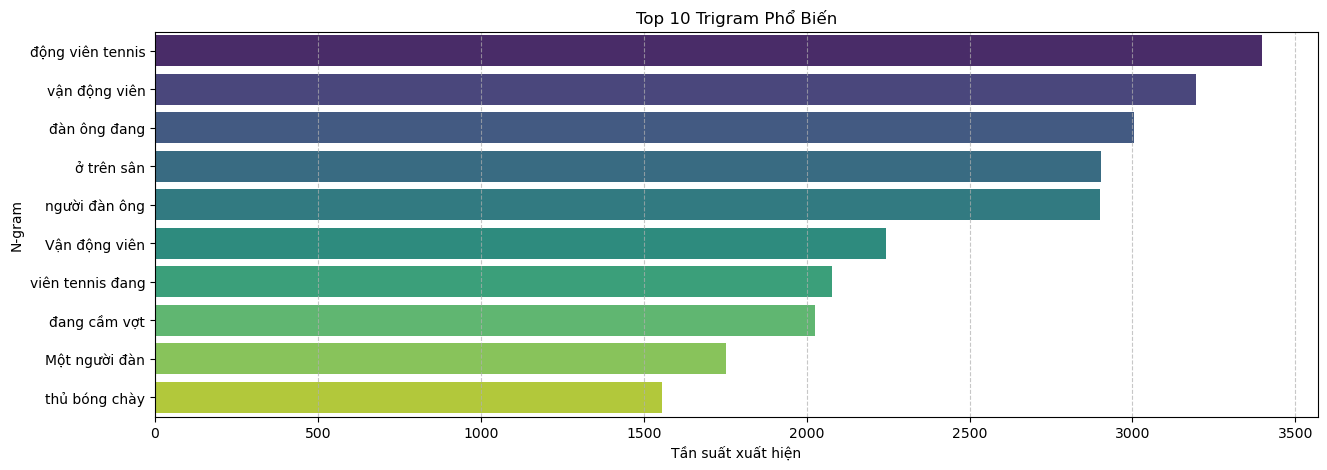

In [20]:
# Hàm vẽ biểu đồ bigram/trigram
def plot_ngrams(ngram_counts, title):
    ngrams, counts = zip(*ngram_counts)
    ngrams = [" ".join(ngram) for ngram in ngrams]  # Chuyển tuple thành chuỗi

    plt.figure(figsize=(15, 5))
    sns.barplot(x=list(counts), y=list(ngrams), hue=list(ngrams), dodge=False, palette="viridis", legend=False)
    plt.xlabel("Tần suất xuất hiện")
    plt.ylabel("N-gram")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.title(title)
    plt.show()

# Tạo bigram & trigram từ captions
bigrams = list(itertools.chain.from_iterable(zip(caption, caption[1:]) for caption in processed_captions))
trigrams = list(itertools.chain.from_iterable(zip(caption, caption[1:], caption[2:]) for caption in processed_captions))

# Đếm tần suất
bigram_counts = Counter(bigrams).most_common(10)
trigram_counts = Counter(trigrams).most_common(10)

# Vẽ biểu đồ
plot_ngrams(bigram_counts, "Top 10 Bigram Phổ Biến")
plot_ngrams(trigram_counts, "Top 10 Trigram Phổ Biến")

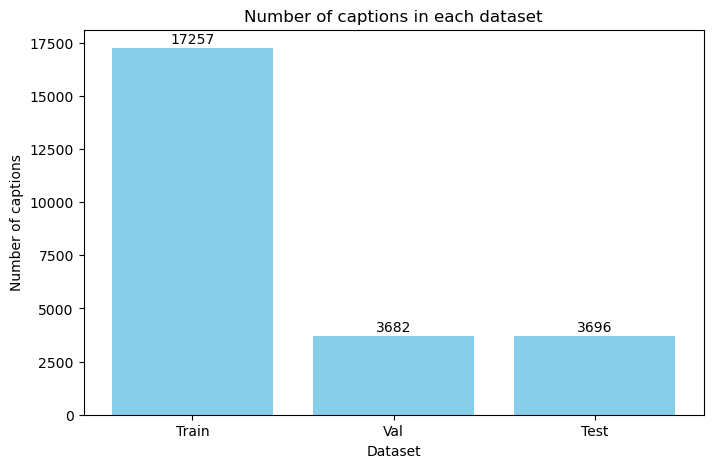

In [32]:
# Kiểm tra số lượng captions trong mỗi file train/val/test
train_path = '../data/US-Capydata-ViSportIC/dataset/train/captions.txt'
val_path = '../data/US-Capydata-ViSportIC/dataset/val/captions.txt'
test_path = '../data/US-Capydata-ViSportIC/dataset/test/captions.txt'

def count_captions(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        captions = f.readlines()
    return len(captions)

train_captions = count_captions(train_path)
val_captions = count_captions(val_path)
test_captions = count_captions(test_path)

plt.figure(figsize=(8, 5))
bars = plt.bar(['Train', 'Val', 'Test'], [train_captions, val_captions, test_captions], color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('Number of captions')
plt.title('Number of captions in each dataset')

# Thêm số ở trên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

plt.show()

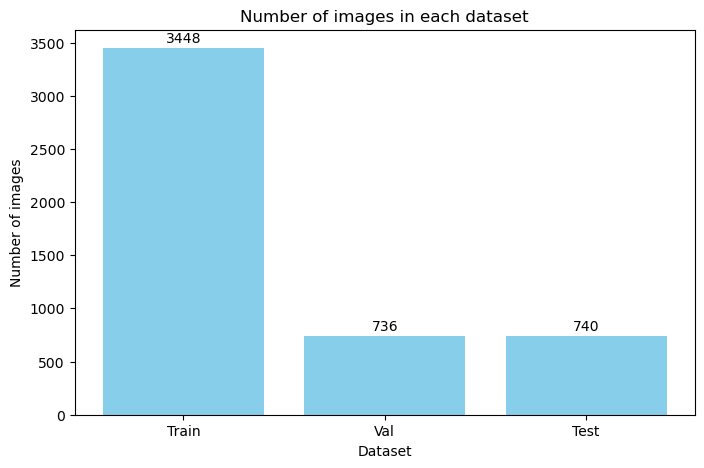

In [33]:
# Kiểm tra số lượng ảnh trong mỗi file train/val/test
train_images = len(os.listdir('../data/US-Capydata-ViSportIC/dataset/train/images'))
val_images = len(os.listdir('../data/US-Capydata-ViSportIC/dataset/val/images'))
test_images = len(os.listdir('../data/US-Capydata-ViSportIC/dataset/test/images'))

plt.figure(figsize=(8, 5))
bars = plt.bar(['Train', 'Val', 'Test'], [train_images, val_images, test_images], color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Number of images in each dataset')

# Thêm số ở trên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 25, int(yval), ha='center', va='bottom')

plt.show()

In [35]:
paths = [
    train_path, val_path
]

sentences = []

for path in paths:
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                sentences.append(parts[1].lower())

sentences = list(set(sentences))

processed_sentences = []
for sentence in sentences:
    sentence = re.sub(r"[^\w\s]", "", sentence) 
    sentence = re.sub(r"\d+", "", sentence)

    words = sentence.split()
    processed_sentences.append(words)

word_counts = Counter(word for sentence in processed_sentences for word in sentence)
vocab = {word for word, count in word_counts.items() if count >= min_freq}

# Tạo word2idx với token đặc biệt cố định
word2idx = {
    "<pad>": 0,
    "<unk>": 1,
    "<s>": 2,
    "</s>": 3,
}

# Thêm các từ còn lại vào word2idx, bắt đầu từ 4
for idx, word in enumerate(sorted(vocab), start=4):
    word2idx[word] = idx

# Lưu từ vựng vào file txt
with open("../vocab/vocab.txt", "w", encoding="utf-8") as f:
    for word, idx in sorted(word2idx.items(), key=lambda x: x[1]):
        f.write(f"{idx}\t{word}\n") 
